In [50]:
import pandas as pd
import sklearn as sk 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sbn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC


In [51]:
#Read the DataSet 
data=pd.read_csv("framingham.csv")
#checking Null Values
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [52]:
#remove all coulmns and rows with null
data = data.dropna()
data=data.dropna(axis=1)
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [53]:
data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [54]:
data.shape

(3656, 16)

In [55]:
#analyses HeartRate Feature
print(data.groupby('heartRate').size().sort_values(ascending=False))

heartRate
75.0     507
80.0     336
70.0     269
60.0     207
85.0     191
        ... 
99.0       1
97.0       1
47.0       1
46.0       1
143.0      1
Length: 72, dtype: int64


male                  Axes(0.125,0.712609;0.168478x0.167391)
age                Axes(0.327174,0.712609;0.168478x0.167391)
education          Axes(0.529348,0.712609;0.168478x0.167391)
currentSmoker      Axes(0.731522,0.712609;0.168478x0.167391)
cigsPerDay            Axes(0.125,0.511739;0.168478x0.167391)
BPMeds             Axes(0.327174,0.511739;0.168478x0.167391)
prevalentStroke    Axes(0.529348,0.511739;0.168478x0.167391)
prevalentHyp       Axes(0.731522,0.511739;0.168478x0.167391)
diabetes               Axes(0.125,0.31087;0.168478x0.167391)
totChol             Axes(0.327174,0.31087;0.168478x0.167391)
sysBP               Axes(0.529348,0.31087;0.168478x0.167391)
diaBP               Axes(0.731522,0.31087;0.168478x0.167391)
BMI                       Axes(0.125,0.11;0.168478x0.167391)
heartRate              Axes(0.327174,0.11;0.168478x0.167391)
glucose                Axes(0.529348,0.11;0.168478x0.167391)
TenYearCHD             Axes(0.731522,0.11;0.168478x0.167391)
dtype: object

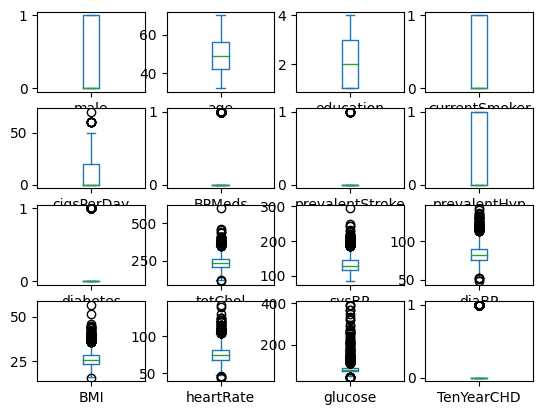

In [56]:
#finding Features that has many outliers 
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

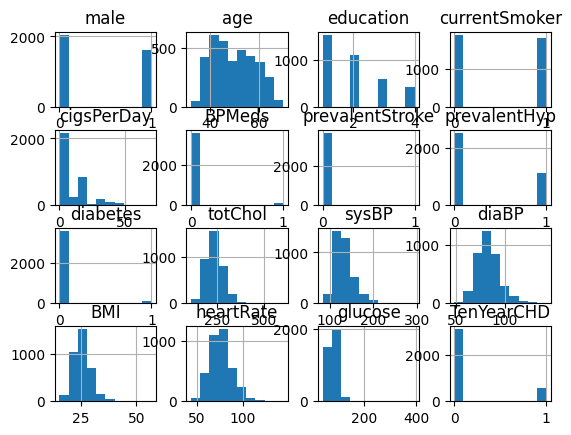

In [57]:
#ploting the histogram to know where the features concentrate
data.hist()

In [58]:
Q1_sys = np.percentile(data['diaBP'], 25, interpolation = 'midpoint')
Q3_sys = np.percentile(data['diaBP'], 75, interpolation = 'midpoint')
IQR_sys = Q3_sys - Q1_sys
upper_bound_sys = Q3_sys + (1.5 * IQR_sys)
lower_bound_sys = Q1_sys - (1.5 * IQR_sys)

new_col=[]
for value in data["diaBP"]:
    if(value<=upper_bound_sys)and(value>=lower_bound_sys):
        new_col.append(value)
    else:
        new_col.append(0)

data["diaBP"]=new_col 

/tmp/ipykernel_37887/1494197461.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1_sys = np.percentile(data['diaBP'], 25, interpolation = 'midpoint')
/tmp/ipykernel_37887/1494197461.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3_sys = np.percentile(data['diaBP'], 75, interpolation = 'midpoint')


In [59]:
Q1_sys = np.percentile(data['glucose'], 25, interpolation = 'midpoint')
Q3_sys = np.percentile(data['glucose'], 75, interpolation = 'midpoint')
IQR_sys = Q3_sys - Q1_sys
upper_bound_sys = Q3_sys + (1.5 * IQR_sys)
lower_bound_sys = Q1_sys - (1.5 * IQR_sys)

new_col=[]
for value in data["glucose"]:
    if(value<=upper_bound_sys)and(value>=lower_bound_sys):
        new_col.append(value)
    else:
        new_col.append(0)

data["glucose"]

/tmp/ipykernel_37887/1197440661.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1_sys = np.percentile(data['glucose'], 25, interpolation = 'midpoint')
/tmp/ipykernel_37887/1197440661.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3_sys = np.percentile(data['glucose'], 75, interpolation = 'midpoint')


0        77.0
1        76.0
2        70.0
3       103.0
4        85.0
        ...  
4231     81.0
4232     79.0
4233     86.0
4234     68.0
4237    107.0
Name: glucose, Length: 3656, dtype: float64

In [60]:
Q1_sys = np.percentile(data['sysBP'], 25, interpolation = 'midpoint')
Q3_sys = np.percentile(data['sysBP'], 75, interpolation = 'midpoint')
IQR_sys = Q3_sys - Q1_sys
upper_bound_sys = Q3_sys + (1.5 * IQR_sys)
lower_bound_sys = Q1_sys - (1.5 * IQR_sys)

new_col=[]
for value in data["sysBP"]:
    if(value<=upper_bound_sys)and(value>=lower_bound_sys):
        new_col.append(value)
    else:
        new_col.append(0)

data["sysBP"]

/tmp/ipykernel_37887/2379819318.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1_sys = np.percentile(data['sysBP'], 25, interpolation = 'midpoint')
/tmp/ipykernel_37887/2379819318.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3_sys = np.percentile(data['sysBP'], 75, interpolation = 'midpoint')


0       106.0
1       121.0
2       127.5
3       150.0
4       130.0
        ...  
4231    141.0
4232    168.0
4233    179.0
4234    126.5
4237    133.5
Name: sysBP, Length: 3656, dtype: float64

male                  Axes(0.125,0.712609;0.168478x0.167391)
age                Axes(0.327174,0.712609;0.168478x0.167391)
education          Axes(0.529348,0.712609;0.168478x0.167391)
currentSmoker      Axes(0.731522,0.712609;0.168478x0.167391)
cigsPerDay            Axes(0.125,0.511739;0.168478x0.167391)
BPMeds             Axes(0.327174,0.511739;0.168478x0.167391)
prevalentStroke    Axes(0.529348,0.511739;0.168478x0.167391)
prevalentHyp       Axes(0.731522,0.511739;0.168478x0.167391)
diabetes               Axes(0.125,0.31087;0.168478x0.167391)
totChol             Axes(0.327174,0.31087;0.168478x0.167391)
sysBP               Axes(0.529348,0.31087;0.168478x0.167391)
diaBP               Axes(0.731522,0.31087;0.168478x0.167391)
BMI                       Axes(0.125,0.11;0.168478x0.167391)
heartRate              Axes(0.327174,0.11;0.168478x0.167391)
glucose                Axes(0.529348,0.11;0.168478x0.167391)
TenYearCHD             Axes(0.731522,0.11;0.168478x0.167391)
dtype: object

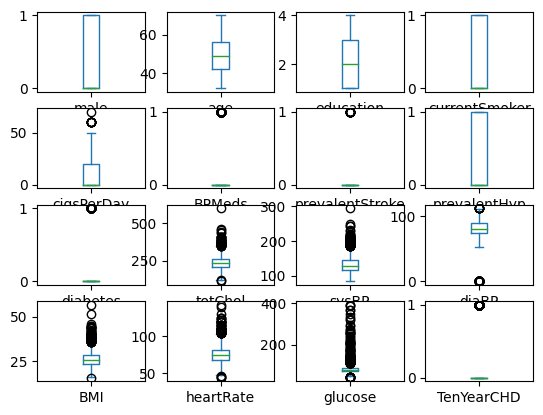

In [61]:
#finding Features that has many outliers 
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)

<Axes: xlabel='TenYearCHD', ylabel='Density'>

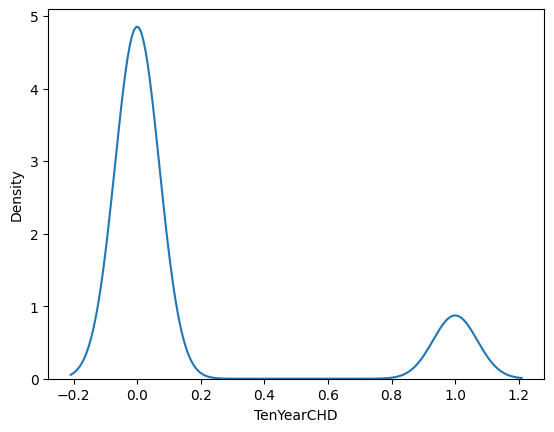

In [62]:
sbn.kdeplot(data=data['TenYearCHD'])

<Axes: xlabel='heartRate', ylabel='Density'>

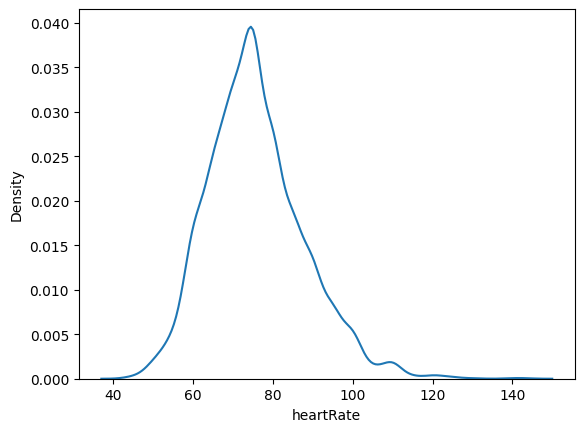

In [63]:
sbn.kdeplot(data=data['heartRate'])

<Axes: ylabel='Density'>

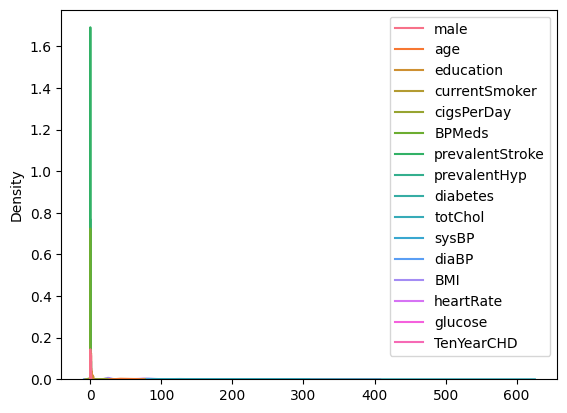

In [64]:
sbn.kdeplot(data)

In [65]:
colums=["currentSmoker","cigsPerDay","prevalentHyp","age","male","education","BPMeds"]

(array([3099.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         557.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

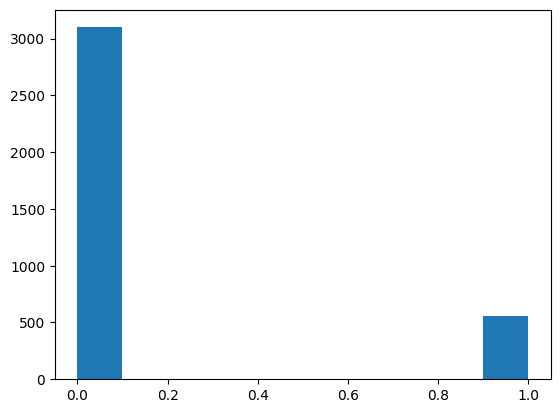

In [66]:
plt.hist(data["TenYearCHD"])

array([[<Axes: xlabel='male', ylabel='male'>,
        <Axes: xlabel='age', ylabel='male'>,
        <Axes: xlabel='education', ylabel='male'>,
        <Axes: xlabel='currentSmoker', ylabel='male'>,
        <Axes: xlabel='cigsPerDay', ylabel='male'>,
        <Axes: xlabel='BPMeds', ylabel='male'>,
        <Axes: xlabel='prevalentStroke', ylabel='male'>,
        <Axes: xlabel='prevalentHyp', ylabel='male'>,
        <Axes: xlabel='diabetes', ylabel='male'>,
        <Axes: xlabel='totChol', ylabel='male'>,
        <Axes: xlabel='sysBP', ylabel='male'>,
        <Axes: xlabel='diaBP', ylabel='male'>,
        <Axes: xlabel='BMI', ylabel='male'>,
        <Axes: xlabel='heartRate', ylabel='male'>,
        <Axes: xlabel='glucose', ylabel='male'>,
        <Axes: xlabel='TenYearCHD', ylabel='male'>],
       [<Axes: xlabel='male', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='education', ylabel='age'>,
        <Axes: xlabel='currentSmoker', ylabel='age'>,
        

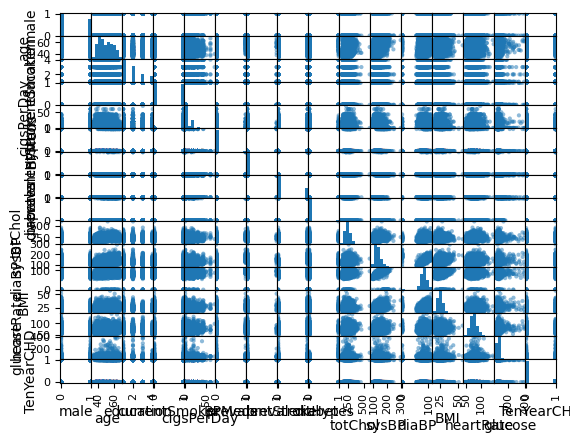

In [67]:
pd.plotting.scatter_matrix(data)

In [68]:
correlation_matrix = data.corr()


correlation_matrix[(correlation_matrix>=.03)|(correlation_matrix<=.03*-1)]


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,NaN,NaN,0.206778,0.331243,-0.052128,NaN,NaN,NaN,-0.070229,-0.045484,0.057177,0.072867,-0.114923,NaN,0.091745
age,NaN,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.081183,0.137172,NaN,0.118245,0.233810
education,NaN,-0.158961,1.000000,NaN,NaN,NaN,-0.030353,-0.079100,-0.039547,NaN,-0.124511,NaN,-0.137280,-0.064254,-0.031874,-0.063068
currentSmoker,0.206778,-0.210862,NaN,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.069294,-0.159574,0.050452,-0.053346,NaN
cigsPerDay,0.331243,-0.189099,NaN,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,NaN,-0.086888,0.063549,-0.053803,0.052159
BPMeds,-0.052128,0.134670,NaN,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,NaN,0.105603,NaN,0.054210,0.089116
prevalentStroke,NaN,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,NaN,NaN,0.061080,0.054099,0.036478,NaN,NaN,0.048351
prevalentHyp,NaN,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.277347,0.302917,0.147333,0.087129,0.181556
diabetes,NaN,0.109027,-0.039547,-0.041859,-0.036934,0.049051,NaN,0.080623,1.000000,0.048371,0.102574,NaN,0.088970,0.060996,0.614817,0.093397
totChol,-0.070229,0.267764,NaN,-0.051119,-0.030222,0.094011,NaN,0.167074,0.048371,1.000000,0.220130,0.127816,0.120799,0.093057,0.049749,0.091127


In [69]:
X=data.drop("TenYearCHD",axis=1)
y=data["TenYearCHD"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=3)

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [71]:
LogisticModel=LogisticRegression(max_iter=5000)
LogisticModel.fit(x_train,y_train)



LogisticRegression(max_iter=5000)

In [72]:
knn = KNeighborsClassifier(n_neighbors =40, algorithm = 'kd_tree')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=40)

In [73]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [74]:
LogisticModel.score(x_test,y_test)


0.8538251366120219

In [75]:
knn.score(x_test,y_test)


0.8469945355191257

In [76]:
svc.score(x_test,y_test)

0.8456284153005464

In [77]:
y_predict=LogisticModel.predict(x_test)

In [78]:
from sklearn.metrics import confusion_matrix 

In [79]:
confusion_matrix(y_test,y_predict)

array([[615,   4],
       [103,  10]])